In [0]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv("creditcard.csv").dropna()

In [0]:
fraud = data.loc[data['Class'] == 1]
normal = data.loc[data['Class'] == 0]

In [0]:
#Data Reading and intial processing

In [0]:
x = data.iloc[:,:-1]
y = data['Class']
print(x.isnull())

         Time     V1     V2     V3     V4  ...    V25    V26    V27    V28  Amount
0       False  False  False  False  False  ...  False  False  False  False   False
1       False  False  False  False  False  ...  False  False  False  False   False
2       False  False  False  False  False  ...  False  False  False  False   False
3       False  False  False  False  False  ...  False  False  False  False   False
4       False  False  False  False  False  ...  False  False  False  False   False
...       ...    ...    ...    ...    ...  ...    ...    ...    ...    ...     ...
284802  False  False  False  False  False  ...  False  False  False  False   False
284803  False  False  False  False  False  ...  False  False  False  False   False
284804  False  False  False  False  False  ...  False  False  False  False   False
284805  False  False  False  False  False  ...  False  False  False  False   False
284806  False  False  False  False  False  ...  False  False  False  False   False

[28

In [0]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [0]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [0]:
#Resampling the imbalance data

In [0]:
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
nm = NearMiss()
x_res,y_res=nm.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
x_res.shape,y_res.shape

((984, 30), (984,))

In [0]:
#Creation of different ML Models with different Parameters

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size= 0.3)

In [0]:
clf = linear_model.LogisticRegression()

In [0]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = np.array(clf.predict(x_test))
y = np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

In [0]:
print(confusion_matrix(y, y_pred))

[[133   5]
 [  9 149]]


In [0]:
print(accuracy_score(y, y_pred))

0.9527027027027027


In [0]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       138
           1       0.97      0.94      0.96       158

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



Area Under ROC Curve : 0.9854613832324345


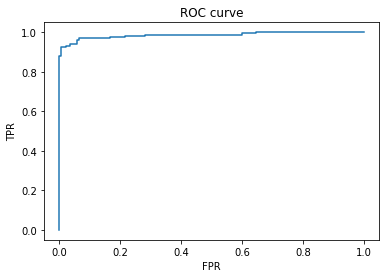

In [0]:
predictions = clf.predict_proba(x_test)
print("Area Under ROC Curve :" , roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
clf2 = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [0]:
clf2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

In [0]:
y_pred = np.array(clf2.predict(x_test))
y = np.array(y_test)

In [0]:
print(confusion_matrix(y, y_pred))

[[136   2]
 [  9 149]]


In [0]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       138
           1       0.99      0.94      0.96       158

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



Area Under ROC Curve : 0.9923179233168227


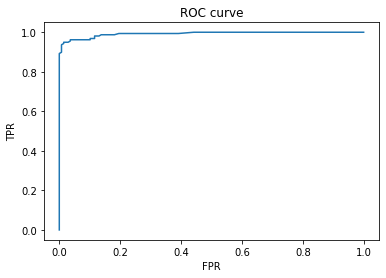

In [0]:
predictions = clf2.predict_proba(x_test)
print("Area Under ROC Curve :" , roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
from sklearn.svm import SVC

In [0]:
clf3 = SVC(C= 1, kernel= 'rbf', random_state= 0, probability=True)
clf3.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = np.array(clf3.predict(x_test))
y = np.array(y_test)

In [0]:
print(confusion_matrix(y, y_pred))

[[116  22]
 [ 88  70]]


In [0]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.84      0.68       138
           1       0.76      0.44      0.56       158

    accuracy                           0.63       296
   macro avg       0.66      0.64      0.62       296
weighted avg       0.67      0.63      0.62       296



In [0]:
print(accuracy_score(y, y_pred))

0.6283783783783784


Area Under ROC Curve : 0.5985140341221794


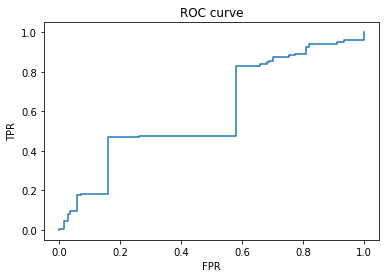

In [0]:
predictions = clf3.predict_proba(x_test)
print("Area Under ROC Curve :" , roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
clf4 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), solver='adam', max_iter=100)
clf4.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
y_pred = np.array(clf4.predict(x_test))
y = np.array(y_test)

In [0]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.53      1.00      0.70       158

    accuracy                           0.53       296
   macro avg       0.27      0.50      0.35       296
weighted avg       0.28      0.53      0.37       296



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Area Under ROC Curve : 0.5084388185654009


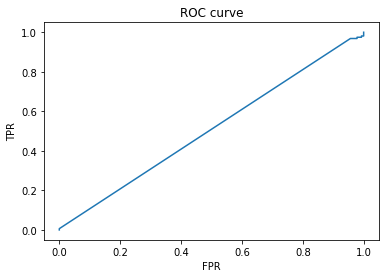

In [0]:
predictions = clf4.predict_proba(x_test)
print("Area Under ROC Curve :" , roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
print(accuracy_score(y, y_pred))

0.5337837837837838


In [0]:
clf5 = SVC(C= 1, kernel= 'linear', random_state= 0, probability=True)
clf5.fit(x_train, y_train)

In [0]:
y_pred = np.array(clf5.predict(x_test))
y = np.array(y_test)

In [0]:
print(classification_report(y, y_pred))

In [0]:
predictions = clf5.predict_proba(x_test)
print("Area Under ROC Curve :" , roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
clf6 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), solver='lbfgs', max_iter=100)
clf6.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
y_pred = np.array(clf6.predict(x_test))
y = np.array(y_test)

In [0]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       138
           1       0.00      0.00      0.00       158

    accuracy                           0.47       296
   macro avg       0.23      0.50      0.32       296
weighted avg       0.22      0.47      0.30       296



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Area Under ROC Curve : 0.5031645569620253


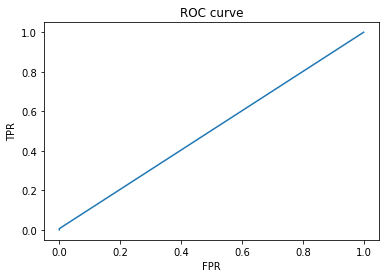

In [0]:
predictions = clf6.predict_proba(x_test)
print("Area Under ROC Curve :" , roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
print(accuracy_score(y, y_pred))

0.46621621621621623


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
clf7 = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
clf7.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_pred = np.array(clf7.predict(x_test))
y = np.array(y_test)

In [0]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       138
           1       0.99      0.86      0.92       158

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



Area Under ROC Curve : 0.9556962025316456


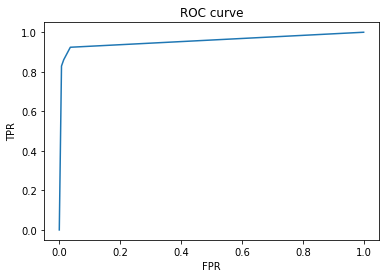

In [0]:
predictions = clf7.predict_proba(x_test)
print("Area Under ROC Curve :" , roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
clf8 = GaussianNB()
clf8.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = np.array(clf8.predict(x_test))
y = np.array(y_test)

In [0]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       138
           1       0.98      0.80      0.88       158

    accuracy                           0.89       296
   macro avg       0.90      0.89      0.89       296
weighted avg       0.90      0.89      0.88       296



Area Under ROC Curve : 0.9817923316822601


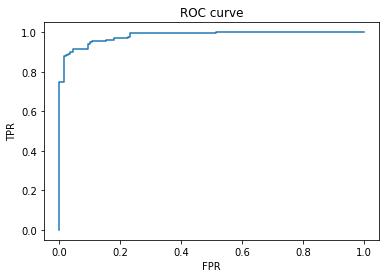

In [0]:
predictions = clf8.predict_proba(x_test)
print("Area Under ROC Curve :" , roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


In [0]:
clf11 = BernoulliNB()
clf11.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
y_pred = np.array(clf11.predict(x_test))
y = np.array(y_test)

In [0]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       138
           1       1.00      0.80      0.89       158

    accuracy                           0.89       296
   macro avg       0.91      0.90      0.89       296
weighted avg       0.91      0.89      0.89       296



Area Under ROC Curve : 0.9630801687763713


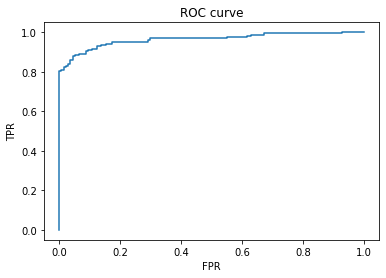

In [0]:
predictions = clf11.predict_proba(x_test)
print("Area Under ROC Curve :" , roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
clf9 = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='entropy',
                             n_estimators=100,
                             verbose=False)

In [0]:
clf9.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

In [0]:
y_pred = np.array(clf9.predict(x_test))
y = np.array(y_test)

In [0]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       138
           1       0.99      0.93      0.96       158

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



Area Under ROC Curve : 0.9914006604292791


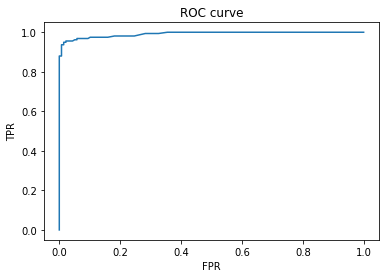

In [0]:
predictions = clf9.predict_proba(x_test)
print("Area Under ROC Curve :" , roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
clf10 = KNeighborsClassifier(n_neighbors=3,metric='manhattan')

In [0]:
clf10.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_pred = np.array(clf10.predict(x_test))
y = np.array(y_test)

In [0]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       138
           1       0.99      0.89      0.94       158

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



Area Under ROC Curve : 0.968285635663181


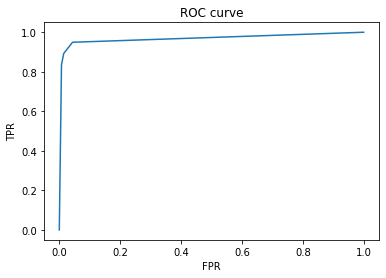

In [0]:
predictions = clf10.predict_proba(x_test)
print("Area Under ROC Curve :" , roc_auc_score(y_test, predictions[:,1]))
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:
#Cross Validation of different models with different Parameters 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [0]:
models = []
models.append(('Random Forest', RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)))
models.append(('SVC', SVC(C= 1, kernel= 'rbf', random_state= 0, probability=True)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)))

In [0]:
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest: 0.956373 (0.029158)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC: 0.645247 (0.091207)
KNN: 0.944821 (0.026497)
NB: 0.898188 (0.033411)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MLP: 0.515985 (0.011127)


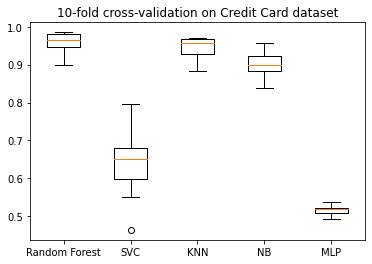

In [0]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Credit Card dataset')
pyplot.show()

In [0]:
models = []
models.append(('KNN Euclidean', KNeighborsClassifier(n_neighbors=3,metric='euclidean')))
models.append(('KNN Manhattan', KNeighborsClassifier(n_neighbors=3,metric='manhattan')))
models.append(('KNN Minkowski', KNeighborsClassifier(n_neighbors=3,metric='minkowski')))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN Euclidean: 0.944821 (0.026497)
KNN Manhattan: 0.952067 (0.026723)
KNN Minkowski: 0.944821 (0.026497)


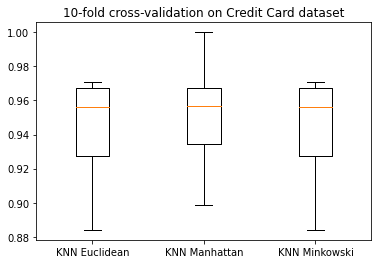

In [0]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Credit Card dataset')
pyplot.show()

In [0]:
models = []
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))

GaussianNB: 0.898188 (0.033411)
BernoulliNB: 0.912681 (0.036800)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


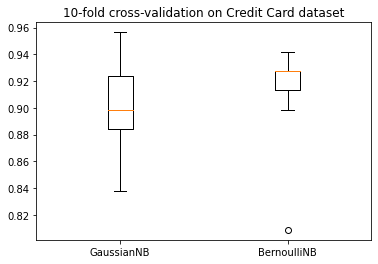

In [0]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Credit Card dataset')
pyplot.show()

In [0]:
models = []
models.append(('Random Forest gini criteria', RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)))
models.append(('Random Forest entropy criteria', RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='entropy',
                             n_estimators=100,
                             verbose=False)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest gini criteria: 0.956373 (0.029158)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest entropy criteria: 0.954902 (0.028121)


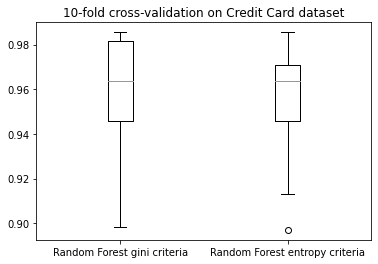

In [0]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Credit Card dataset')
pyplot.show()

In [0]:
models = []
models.append(('LR saga solver', linear_model.LogisticRegression(solver='saga')))
models.append(('LR lbfgs solver', linear_model.LogisticRegression(solver='lbfgs')))
models.append(('LR newton-cg solver', linear_model.LogisticRegression(solver='newton-cg')))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: Th

LR saga solver: 0.524680 (0.015241)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR lbfgs solver: 0.944693 (0.023501)


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

LR newton-cg solver: 0.950490 (0.031494)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


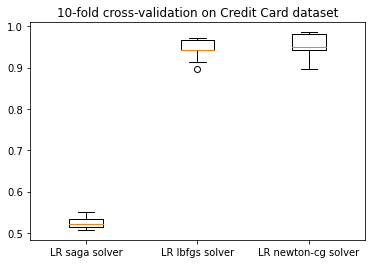

In [0]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Credit Card dataset')
pyplot.show()